In [19]:
#Attempt to clear up test set confusion

In [20]:
#https://notes.quantecon.org/submission/5cc8e7dd4174bb001a39a8ff
import statsmodels as sm
#https://www.statsmodels.org/dev/vector_ar.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set()
import datetime as dt
import warnings
warnings.simplefilter('ignore')
from sklearn import (linear_model, metrics, neural_network, pipeline, preprocessing, model_selection)

In [21]:
#https://stackoverflow.com/questions/20681297/vector-autoregressive-model-fitting-with-scikit-learn
#https://www.analyticsvidhya.com/blog/2021/08/vector-autoregressive-model-in-python/
#https://blog.devgenius.io/implementing-vector-autoregression-from-scratch-with-python-b12eedbf35ad
#https://notes.quantecon.org/submission/5cc8e7dd4174bb001a39a8ff

#Bayesian VAR
#https://github.com/joergrieger/pybvar

In [22]:
#RMSE loss function

In [23]:
train_df = pd.read_csv('/Users/aashrit/Documents/Masters/MY498/Data/Time Series/twitter_reddit_time_series_copy3.csv')
train_df = train_df.set_index('date')
#train = train.iloc[20:,:]
train_df

,overall_sentiment_score_20d_lag,overall_attention_score_20d_lag,BEIR,interest_rate_1yr_lag,commodities_1yr_lag,UNRATENSA_1yr_lag,UMCSENT_2wk_lag,WM2NS_1yr_lag,gdp_1yr_lag,USDEUR_1yr_lag
date,,,,,,,,,,
01/06/2021,26.4459,3.900597,2.460,0.05,99.875276,11.2,82.9,17915.4,19477.444,1.224100
02/06/2021,51.3641,2.348224,2.440,0.06,99.875276,11.2,82.9,17915.4,19477.444,1.221300
03/06/2021,48.4431,1.156789,2.420,0.06,99.875276,11.2,82.9,17915.4,19477.444,1.212200
04/06/2021,17.4456,0.903695,2.400,0.06,99.875276,11.2,82.9,17915.4,19477.444,1.217300
05/06/2021,28.1433,0.947890,2.400,0.07,99.875276,11.2,82.9,17915.4,19477.444,1.216933
...,...,...,...,...,...,...,...,...,...,...
27/05/2022,-56.0960,2.735565,2.630,0.06,155.100579,5.5,58.4,20235.1,22740.959,1.070900
28/05/2022,-4.0143,1.563207,2.630,0.05,155.100579,5.5,58.4,20235.1,22740.959,1.069733
29/05/2022,1.4806,3.380288,2.630,0.05,155.100579,5.5,58.4,20235.1,22740.959,1.071044


In [24]:
X_train = train_df.drop(['BEIR'],axis=1)
y_train = train_df['BEIR']
X_test = train_df.drop(['BEIR'],axis=1)
y_test = train_df['BEIR']

In [25]:
#train_df = train.iloc[:,4:]
train_df

,overall_sentiment_score_20d_lag,overall_attention_score_20d_lag,BEIR,interest_rate_1yr_lag,commodities_1yr_lag,UNRATENSA_1yr_lag,UMCSENT_2wk_lag,WM2NS_1yr_lag,gdp_1yr_lag,USDEUR_1yr_lag
date,,,,,,,,,,
01/06/2021,26.4459,3.900597,2.460,0.05,99.875276,11.2,82.9,17915.4,19477.444,1.224100
02/06/2021,51.3641,2.348224,2.440,0.06,99.875276,11.2,82.9,17915.4,19477.444,1.221300
03/06/2021,48.4431,1.156789,2.420,0.06,99.875276,11.2,82.9,17915.4,19477.444,1.212200
04/06/2021,17.4456,0.903695,2.400,0.06,99.875276,11.2,82.9,17915.4,19477.444,1.217300
05/06/2021,28.1433,0.947890,2.400,0.07,99.875276,11.2,82.9,17915.4,19477.444,1.216933
...,...,...,...,...,...,...,...,...,...,...
27/05/2022,-56.0960,2.735565,2.630,0.06,155.100579,5.5,58.4,20235.1,22740.959,1.070900
28/05/2022,-4.0143,1.563207,2.630,0.05,155.100579,5.5,58.4,20235.1,22740.959,1.069733
29/05/2022,1.4806,3.380288,2.630,0.05,155.100579,5.5,58.4,20235.1,22740.959,1.071044


In [26]:
#https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [28]:
#Visualising time series

In [29]:
#Granger causality test

In [30]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(train_df, variables = train_df.columns)  

,overall_sentiment_score_20d_lag_x,overall_attention_score_20d_lag_x,BEIR_x,interest_rate_1yr_lag_x,commodities_1yr_lag_x,UNRATENSA_1yr_lag_x,UMCSENT_2wk_lag_x,WM2NS_1yr_lag_x,gdp_1yr_lag_x,USDEUR_1yr_lag_x
overall_sentiment_score_20d_lag_y,1.0000,0.0000,0.0001,0.0003,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
overall_attention_score_20d_lag_y,0.0021,1.0000,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0001,0.0000
BEIR_y,0.0227,0.0356,1.0000,0.2165,0.1209,0.0434,0.0020,0.0525,0.0704,0.0575
interest_rate_1yr_lag_y,0.0003,0.2591,0.0053,1.0000,0.0000,0.0004,0.0000,0.0000,0.0000,0.0000
commodities_1yr_lag_y,0.5139,0.0001,0.2413,0.2642,1.0000,0.4093,0.7968,0.0083,0.6282,0.0151
UNRATENSA_1yr_lag_y,0.5040,0.6916,0.4411,0.0425,0.8691,1.0000,0.2437,0.0375,0.2335,0.4836
UMCSENT_2wk_lag_y,0.0228,0.0088,0.2582,0.9392,0.0240,0.0204,1.0000,0.0461,0.0108,0.0425
WM2NS_1yr_lag_y,0.0093,0.0000,0.0458,0.1279,0.0206,0.0061,0.0018,1.0000,0.0004,0.3534
gdp_1yr_lag_y,0.8600,0.0014,0.1724,0.0109,0.0654,0.6144,0.3670,0.0074,1.0000,0.0119
USDEUR_1yr_lag_y,0.0913,0.0312,0.0308,0.1072,0.0361,0.2170,0.2927,0.0002,0.2348,1.0000


In [31]:
#Cointegration test

In [32]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(train_df)
#cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
overall_sentiment_score_20d_lag ::  230.56    > 219.4051  =>   True
overall_attention_score_20d_lag ::  172.15    > 179.5199  =>   False
BEIR   ::  131.76    > 143.6691  =>   False
interest_rate_1yr_lag ::  97.1      > 111.7797  =>   False
commodities_1yr_lag ::  70.52     > 83.9383   =>   False
UNRATENSA_1yr_lag ::  47.87     > 60.0627   =>   False
UMCSENT_2wk_lag ::  30.21     > 40.1749   =>   False
WM2NS_1yr_lag ::  17.1      > 24.2761   =>   False
gdp_1yr_lag ::  7.91      > 12.3212   =>   False
USDEUR_1yr_lag ::  1.4       > 4.1296    =>   False


In [33]:
#Train test split

In [34]:
nobs = 31
#df_train, df_test = train_df[0:-nobs], train_df[-nobs:]
df_train = train_df

In [37]:
df_train
df_test

,overall_sentiment_score_20d_lag,overall_attention_score_20d_lag,BEIR,interest_rate_1yr_lag,commodities_1yr_lag,UNRATENSA_1yr_lag,UMCSENT_2wk_lag,WM2NS_1yr_lag,gdp_1yr_lag,USDEUR_1yr_lag
date,,,,,,,,,,
01/05/2022,1.7979,2.171184,2.880,0.05,155.100579,5.5,65.2,20150.2,22740.959,1.052189
02/05/2022,11.3230,9.070342,2.810,0.05,155.100579,5.5,65.2,20150.2,22740.959,1.052100
03/05/2022,-17.5748,7.017218,2.830,0.06,155.100579,5.5,65.2,20275.5,22740.959,1.053200
04/05/2022,-1.6031,4.326948,2.860,0.06,155.100579,5.5,65.2,20275.5,22740.959,1.053900
05/05/2022,16.8282,3.289849,2.870,0.06,155.100579,5.5,65.2,20275.5,22740.959,1.050700
06/05/2022,-6.9053,2.312886,2.860,0.06,155.100579,5.5,65.2,20275.5,22740.959,1.057200
07/05/2022,-4.9242,1.637116,2.860,0.06,155.100579,5.5,65.2,20275.5,22740.959,1.053933
08/05/2022,14.0925,2.516328,2.860,0.06,155.100579,5.5,65.2,20275.5,22740.959,1.053944
09/05/2022,28.9857,2.359621,2.750,0.06,155.100579,5.5,65.2,20275.5,22740.959,1.055900


In [38]:
#Stationarity test

In [39]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')
    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [40]:
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')
    #print(name, column)

    Augmented Dickey-Fuller Test on "overall_sentiment_score_20d_lag" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.1775
 No. Lags Chosen       = 9
 Critical value 1%     = -3.449
 Critical value 5%     = -2.87
 Critical value 10%    = -2.571
 => P-Value = 0.2145. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "overall_attention_score_20d_lag" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.325
 No. Lags Chosen       = 5
 Critical value 1%     = -3.449
 Critical value 5%     = -2.87
 Critical value 10%    = -2.571
 => P-Value = 0.164. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "BEIR" 
    --------------------------------

In [41]:
train_df_differenced = df_train.diff().dropna()

In [42]:
for name, column in train_df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "overall_sentiment_score_20d_lag" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.1274
 No. Lags Chosen       = 8
 Critical value 1%     = -3.449
 Critical value 5%     = -2.87
 Critical value 10%    = -2.571
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "overall_attention_score_20d_lag" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.7282
 No. Lags Chosen       = 11
 Critical value 1%     = -3.449
 Critical value 5%     = -2.87
 Critical value 10%    = -2.571
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "BEIR" 
    -----------------------------------------------
 Null Hypothesis: Data has unit

In [43]:
df_train

,overall_sentiment_score_20d_lag,overall_attention_score_20d_lag,BEIR,interest_rate_1yr_lag,commodities_1yr_lag,UNRATENSA_1yr_lag,UMCSENT_2wk_lag,WM2NS_1yr_lag,gdp_1yr_lag,USDEUR_1yr_lag
date,,,,,,,,,,
01/06/2021,26.4459,3.900597,2.460,0.05,99.875276,11.2,82.9,17915.4,19477.444,1.224100
02/06/2021,51.3641,2.348224,2.440,0.06,99.875276,11.2,82.9,17915.4,19477.444,1.221300
03/06/2021,48.4431,1.156789,2.420,0.06,99.875276,11.2,82.9,17915.4,19477.444,1.212200
04/06/2021,17.4456,0.903695,2.400,0.06,99.875276,11.2,82.9,17915.4,19477.444,1.217300
05/06/2021,28.1433,0.947890,2.400,0.07,99.875276,11.2,82.9,17915.4,19477.444,1.216933
...,...,...,...,...,...,...,...,...,...,...
27/05/2022,-56.0960,2.735565,2.630,0.06,155.100579,5.5,58.4,20235.1,22740.959,1.070900
28/05/2022,-4.0143,1.563207,2.630,0.05,155.100579,5.5,58.4,20235.1,22740.959,1.069733
29/05/2022,1.4806,3.380288,2.630,0.05,155.100579,5.5,58.4,20235.1,22740.959,1.071044


In [44]:
train_df_differenced

,overall_sentiment_score_20d_lag,overall_attention_score_20d_lag,BEIR,interest_rate_1yr_lag,commodities_1yr_lag,UNRATENSA_1yr_lag,UMCSENT_2wk_lag,WM2NS_1yr_lag,gdp_1yr_lag,USDEUR_1yr_lag
date,,,,,,,,,,
02/06/2021,24.9182,-1.552373,-0.020,0.01,0.0,0.0,0.0,0.0,0.0,-0.002800
03/06/2021,-2.9210,-1.191435,-0.020,0.00,0.0,0.0,0.0,0.0,0.0,-0.009100
04/06/2021,-30.9975,-0.253094,-0.020,0.00,0.0,0.0,0.0,0.0,0.0,0.005100
05/06/2021,10.6977,0.044196,0.000,0.01,0.0,0.0,0.0,0.0,0.0,-0.000367
06/06/2021,30.6460,-0.248359,0.000,0.00,0.0,0.0,0.0,0.0,0.0,-0.001456
...,...,...,...,...,...,...,...,...,...,...
27/05/2022,-73.9494,-0.728901,0.010,0.00,0.0,0.0,0.0,0.0,0.0,-0.001600
28/05/2022,52.0817,-1.172357,0.000,-0.01,0.0,0.0,0.0,0.0,0.0,-0.001167
29/05/2022,5.4949,1.817081,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.001311


In [45]:
def plot_vars(data, levels, color, leveltype, name):
    
    """
    Displays historical trends of VAR variables
    And see if it's sensible to just select levels instead of differences
    """
    
    fig, ax = plt.subplots(1, 2, figsize=(12,2.5), sharex=True)
    
    palettes = ["blue", "green", "red", "orange", "purple", "black"]
    
    for col, i in dict(zip(levels, list(range(3)))).items():
        data[col].plot(ax=ax[i], legend=True, linewidth=1.0, color=color, sharex=True)     
    
    plt.xticks(rotation=45)
    #fig.xlabel
    fig.set_facecolor("floralwhite")
    fig.savefig(name, bbox_inches='tight')
    fig.suptitle(f"Historical trends of VAR {leveltype} variables", 
                 fontsize=14, fontweight="bold", fontname="Verdana")

In [46]:
#train_df_differenced.columns

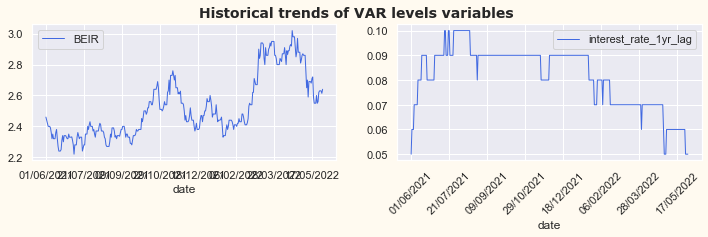

In [47]:
plot_vars(train_df, levels = ['BEIR', 'interest_rate_1yr_lag'], color="royalblue", leveltype="levels", name='levels1')

In [48]:
def plot_vars(data, levels, color, leveltype, name):
    
    """
    Displays historical trends of VAR variables
    And see if it's sensible to just select levels instead of differences
    """
    
    fig, ax = plt.subplots(1, 2, figsize=(12,2.5), sharex=True)
    
    palettes = ["blue", "green", "red", "orange", "purple", "black"]
    
    for col, i in dict(zip(levels, list(range(3)))).items():
        data[col].plot(ax=ax[i], legend=True, linewidth=1.0, color=color, sharex=True)     
    
    plt.xticks(rotation=45)
    #fig.xlabel
    fig.set_facecolor("floralwhite")
    fig.savefig(name, bbox_inches='tight')

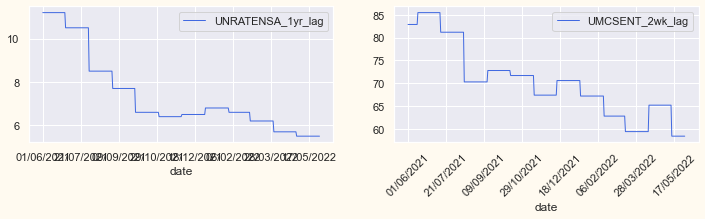

In [49]:
plot_vars(train_df, levels = ['UNRATENSA_1yr_lag', 'UMCSENT_2wk_lag'], color="royalblue", leveltype="levels", name='levels2')

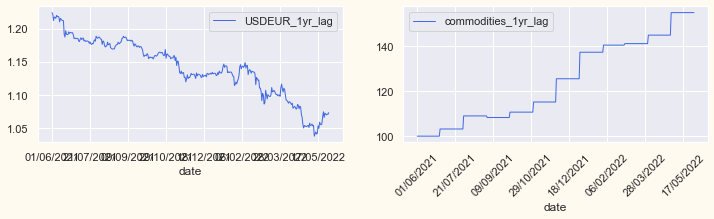

In [50]:
plot_vars(train_df, levels = ['USDEUR_1yr_lag', 'commodities_1yr_lag'], color="royalblue", leveltype="levels", name='levels3')

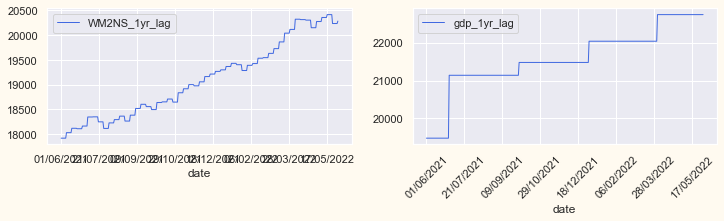

In [51]:
plot_vars(train_df, levels = ['WM2NS_1yr_lag', 'gdp_1yr_lag'], color="royalblue", leveltype="levels", name='levels4')

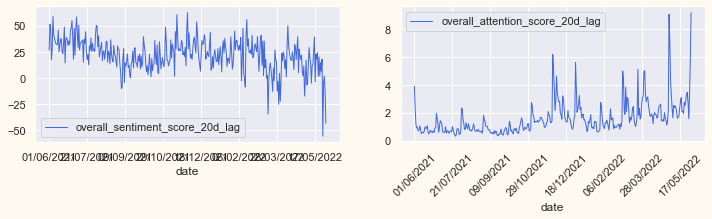

In [52]:
plot_vars(train_df, levels = ['overall_sentiment_score_20d_lag', 'overall_attention_score_20d_lag'], color="royalblue", leveltype="levels", name='levels5')

In [53]:
def plot_vars(data, levels, color, leveltype, name):
    
    """
    Displays historical trends of VAR variables
    And see if it's sensible to just select levels instead of differences
    """
    
    fig, ax = plt.subplots(1, 2, figsize=(12,2.5), sharex=True)
    
    palettes = ["blue", "green", "red", "orange", "purple", "black"]
    
    for col, i in dict(zip(levels, list(range(3)))).items():
        data[col].plot(ax=ax[i], legend=True, linewidth=1.0, color=color, sharex=True)     
    
    plt.xticks(rotation=45)
    #fig.xlabel
    fig.set_facecolor("floralwhite")
    fig.savefig(name, bbox_inches='tight')
    fig.suptitle(f"Historical trends of VAR {leveltype} variables", 
                 fontsize=14, fontweight="bold", fontname="Verdana")

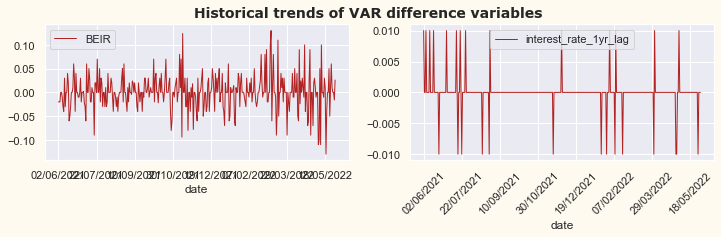

In [54]:
plot_vars(train_df_differenced, levels = ['BEIR', 'interest_rate_1yr_lag'], color="firebrick", leveltype="difference", name='difference1')

In [55]:
def plot_vars(data, levels, color, leveltype, name):
    
    """
    Displays historical trends of VAR variables
    And see if it's sensible to just select levels instead of differences
    """
    
    fig, ax = plt.subplots(1, 2, figsize=(12,2.5), sharex=True)
    
    palettes = ["blue", "green", "red", "orange", "purple", "black"]
    
    for col, i in dict(zip(levels, list(range(3)))).items():
        data[col].plot(ax=ax[i], legend=True, linewidth=1.0, color=color, sharex=True)     
    
    plt.xticks(rotation=45)
    #fig.xlabel
    fig.set_facecolor("floralwhite")
    fig.savefig(name, bbox_inches='tight')

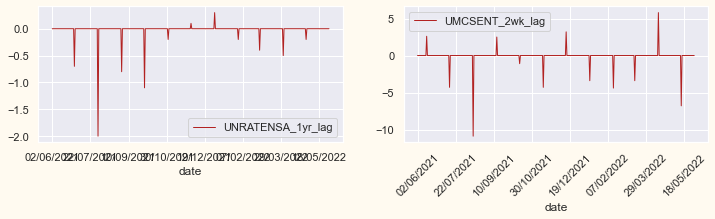

In [56]:
plot_vars(train_df_differenced, levels = ['UNRATENSA_1yr_lag', 'UMCSENT_2wk_lag'], color="firebrick", leveltype="difference", name='difference2')

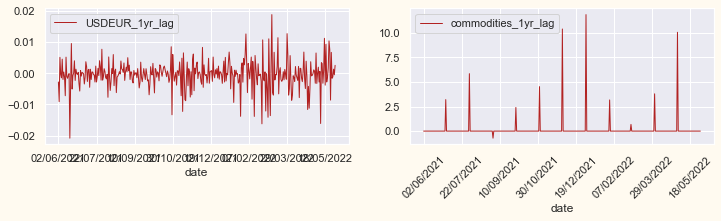

In [57]:
plot_vars(train_df_differenced, levels = ['USDEUR_1yr_lag', 'commodities_1yr_lag'], color="firebrick", leveltype="difference", name='difference3')

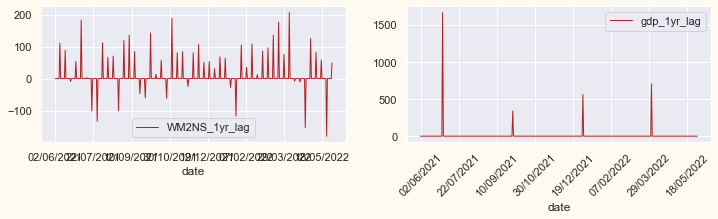

In [58]:
plot_vars(train_df_differenced, levels = ['WM2NS_1yr_lag', 'gdp_1yr_lag'], color="firebrick", leveltype="difference", name='difference4')

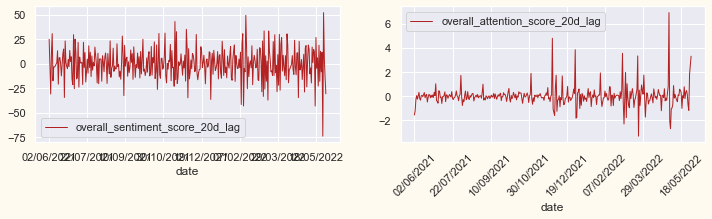

In [59]:
plot_vars(train_df_differenced, levels = ['overall_sentiment_score_20d_lag', 'overall_attention_score_20d_lag'], color="firebrick", leveltype="difference", name='difference5')

In [60]:
#Selecting appropriate lag
train_df_differenced

,overall_sentiment_score_20d_lag,overall_attention_score_20d_lag,BEIR,interest_rate_1yr_lag,commodities_1yr_lag,UNRATENSA_1yr_lag,UMCSENT_2wk_lag,WM2NS_1yr_lag,gdp_1yr_lag,USDEUR_1yr_lag
date,,,,,,,,,,
02/06/2021,24.9182,-1.552373,-0.020,0.01,0.0,0.0,0.0,0.0,0.0,-0.002800
03/06/2021,-2.9210,-1.191435,-0.020,0.00,0.0,0.0,0.0,0.0,0.0,-0.009100
04/06/2021,-30.9975,-0.253094,-0.020,0.00,0.0,0.0,0.0,0.0,0.0,0.005100
05/06/2021,10.6977,0.044196,0.000,0.01,0.0,0.0,0.0,0.0,0.0,-0.000367
06/06/2021,30.6460,-0.248359,0.000,0.00,0.0,0.0,0.0,0.0,0.0,-0.001456
...,...,...,...,...,...,...,...,...,...,...
27/05/2022,-73.9494,-0.728901,0.010,0.00,0.0,0.0,0.0,0.0,0.0,-0.001600
28/05/2022,52.0817,-1.172357,0.000,-0.01,0.0,0.0,0.0,0.0,0.0,-0.001167
29/05/2022,5.4949,1.817081,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.001311


In [61]:
model = VAR(train_df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')
    
#Almost all criteria hit minimum at 1 lag

Lag Order = 1
AIC :  -11.952007026055847
BIC :  -10.771884955066499
FPE :  6.447478628112629e-06
HQIC:  -11.482914160311033 

Lag Order = 2
AIC :  -11.83381629005978
BIC :  -9.576232631265823
FPE :  7.264492160674454e-06
HQIC:  -10.936344613363874 

Lag Order = 3
AIC :  -11.648416026505968
BIC :  -8.308936339294906
FPE :  8.76998294085705e-06
HQIC:  -10.320713539938497 

Lag Order = 4
AIC :  -11.44321712058905
BIC :  -7.01737641810415
FPE :  1.0828904533780961e-05
HQIC:  -9.68341893804553 

Lag Order = 5
AIC :  -11.33419691891544
BIC :  -5.817499375380558
FPE :  1.2190558754407299e-05
HQIC:  -9.140425144308821 

Lag Order = 6
AIC :  -11.056506226205386
BIC :  -4.444424880662293
FPE :  1.6322930753591486e-05
HQIC:  -8.426869829185975 

Lag Order = 7
AIC :  -10.752181100049157
BIC :  -3.0401575564537957
FPE :  2.2579722502502787e-05
HQIC:  -7.684775790221444 

Lag Order = 8
AIC :  -10.372890007570923
BIC :  -1.556334131194113
FPE :  3.3908974943090284e-05
HQIC:  -6.865798107185368 

Lag 

In [62]:
model_fitted = model.fit(1)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 14, Aug, 2022
Time:                     11:45:25
--------------------------------------------------------------------
No. of Equations:         10.0000    BIC:                   -10.7719
Nobs:                     363.000    HQIC:                  -11.4829
Log likelihood:          -2871.46    FPE:                6.44748e-06
AIC:                     -11.9520    Det(Omega_mle):     4.78344e-06
--------------------------------------------------------------------
Results for equation overall_sentiment_score_20d_lag
                                        coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------------------
const                                     -0.390428         0.792818           -0.492           0.622
L1.overall_sentiment_score_20d_lag        -0.403093 

In [63]:
#Checking for serial correlation#
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(train_df_differenced.columns, out):
    print(str(col), ':', round(val, 2))

overall_sentiment_score_20d_lag : 2.26
overall_attention_score_20d_lag : 1.94
BEIR : 1.99
interest_rate_1yr_lag : 2.04
commodities_1yr_lag : 2.04
UNRATENSA_1yr_lag : 2.01
UMCSENT_2wk_lag : 2.0
WM2NS_1yr_lag : 2.05
gdp_1yr_lag : 2.01
USDEUR_1yr_lag : 2.06


In [64]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = train_df_differenced.values[-lag_order:]
forecast_input

1


array([[-3.07115000e+01,  3.29762634e+00,  2.60000000e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  4.88000000e+01,  0.00000000e+00,
         2.54074000e-03]])

In [65]:
#df_train
train_df_differenced

,overall_sentiment_score_20d_lag,overall_attention_score_20d_lag,BEIR,interest_rate_1yr_lag,commodities_1yr_lag,UNRATENSA_1yr_lag,UMCSENT_2wk_lag,WM2NS_1yr_lag,gdp_1yr_lag,USDEUR_1yr_lag
date,,,,,,,,,,
02/06/2021,24.9182,-1.552373,-0.020,0.01,0.0,0.0,0.0,0.0,0.0,-0.002800
03/06/2021,-2.9210,-1.191435,-0.020,0.00,0.0,0.0,0.0,0.0,0.0,-0.009100
04/06/2021,-30.9975,-0.253094,-0.020,0.00,0.0,0.0,0.0,0.0,0.0,0.005100
05/06/2021,10.6977,0.044196,0.000,0.01,0.0,0.0,0.0,0.0,0.0,-0.000367
06/06/2021,30.6460,-0.248359,0.000,0.00,0.0,0.0,0.0,0.0,0.0,-0.001456
...,...,...,...,...,...,...,...,...,...,...
27/05/2022,-73.9494,-0.728901,0.010,0.00,0.0,0.0,0.0,0.0,0.0,-0.001600
28/05/2022,52.0817,-1.172357,0.000,-0.01,0.0,0.0,0.0,0.0,0.0,-0.001167
29/05/2022,5.4949,1.817081,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.001311


In [66]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df_train.index[-nobs:], columns=df_train.columns + '_1d')
df_forecast

,overall_sentiment_score_20d_lag_1d,overall_attention_score_20d_lag_1d,BEIR_1d,interest_rate_1yr_lag_1d,commodities_1yr_lag_1d,UNRATENSA_1yr_lag_1d,UMCSENT_2wk_lag_1d,WM2NS_1yr_lag_1d,gdp_1yr_lag_1d,USDEUR_1yr_lag_1d
date,,,,,,,,,,
01/05/2022,5.772958,-0.277291,0.003733,0.000205,0.676903,-0.027368,-0.007632,22.280299,9.724175,0.000377
02/05/2022,-1.464491,0.135403,-0.003081,0.000003,0.092023,-0.014986,-0.090277,4.915172,5.034970,-0.000384
03/05/2022,-0.067339,0.002294,0.001192,-0.000035,0.177308,-0.016009,-0.057424,7.189762,9.611962,-0.000437
04/05/2022,-0.263804,0.023400,0.000467,-0.000025,0.151422,-0.015864,-0.068350,6.524646,9.000516,-0.000389
05/05/2022,-0.232382,0.018259,0.000569,-0.000023,0.155395,-0.015801,-0.067263,6.605195,9.030698,-0.000408
06/05/2022,-0.234386,0.019005,0.000562,-0.000025,0.154468,-0.015805,-0.067331,6.589675,9.036359,-0.000404
07/05/2022,-0.235267,0.018885,0.000562,-0.000024,0.154613,-0.015807,-0.067359,6.590713,9.035968,-0.000405
08/05/2022,-0.234604,0.018891,0.000563,-0.000025,0.154589,-0.015806,-0.067350,6.590648,9.035885,-0.000405
09/05/2022,-0.234887,0.018895,0.000562,-0.000025,0.154590,-0.015806,-0.067353,6.590600,9.035917,-0.000405


In [67]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [68]:
df_results = invert_transformation(df_train, df_forecast, second_diff=False)

In [69]:
df_results
#.iloc[:,6:]

,overall_sentiment_score_20d_lag_1d,overall_attention_score_20d_lag_1d,BEIR_1d,interest_rate_1yr_lag_1d,commodities_1yr_lag_1d,UNRATENSA_1yr_lag_1d,UMCSENT_2wk_lag_1d,WM2NS_1yr_lag_1d,gdp_1yr_lag_1d,USDEUR_1yr_lag_1d,overall_sentiment_score_20d_lag_forecast,overall_attention_score_20d_lag_forecast,BEIR_forecast,interest_rate_1yr_lag_forecast,commodities_1yr_lag_forecast,UNRATENSA_1yr_lag_forecast,UMCSENT_2wk_lag_forecast,WM2NS_1yr_lag_forecast,gdp_1yr_lag_forecast,USDEUR_1yr_lag_forecast
date,,,,,,,,,,,,,,,,,,,,
01/05/2022,5.772958,-0.277291,0.003733,0.000205,0.676903,-0.027368,-0.007632,22.280299,9.724175,0.000377,-37.917942,8.916790,2.643733,0.050205,155.777482,5.472632,58.392368,20306.180299,22750.683175,1.073477
02/05/2022,-1.464491,0.135403,-0.003081,0.000003,0.092023,-0.014986,-0.090277,4.915172,5.034970,-0.000384,-39.382433,9.052194,2.640652,0.050208,155.869505,5.457646,58.302091,20311.095471,22755.718145,1.073093
03/05/2022,-0.067339,0.002294,0.001192,-0.000035,0.177308,-0.016009,-0.057424,7.189762,9.611962,-0.000437,-39.449772,9.054487,2.641845,0.050174,156.046813,5.441637,58.244667,20318.285233,22765.330107,1.072656
04/05/2022,-0.263804,0.023400,0.000467,-0.000025,0.151422,-0.015864,-0.068350,6.524646,9.000516,-0.000389,-39.713575,9.077888,2.642312,0.050149,156.198236,5.425773,58.176317,20324.809879,22774.330622,1.072267
05/05/2022,-0.232382,0.018259,0.000569,-0.000023,0.155395,-0.015801,-0.067263,6.605195,9.030698,-0.000408,-39.945958,9.096147,2.642881,0.050125,156.353631,5.409972,58.109054,20331.415074,22783.361321,1.071859
06/05/2022,-0.234386,0.019005,0.000562,-0.000025,0.154468,-0.015805,-0.067331,6.589675,9.036359,-0.000404,-40.180343,9.115152,2.643443,0.050101,156.508099,5.394167,58.041723,20338.004749,22792.397680,1.071455
07/05/2022,-0.235267,0.018885,0.000562,-0.000024,0.154613,-0.015807,-0.067359,6.590713,9.035968,-0.000405,-40.415610,9.134037,2.644005,0.050076,156.662711,5.378360,57.974365,20344.595462,22801.433648,1.071050
08/05/2022,-0.234604,0.018891,0.000563,-0.000025,0.154589,-0.015806,-0.067350,6.590648,9.035885,-0.000405,-40.650214,9.152928,2.644568,0.050051,156.817300,5.362554,57.907015,20351.186109,22810.469533,1.070645
09/05/2022,-0.234887,0.018895,0.000562,-0.000025,0.154590,-0.015806,-0.067353,6.590600,9.035917,-0.000405,-40.885101,9.171823,2.645130,0.050027,156.971890,5.346748,57.839662,20357.776709,22819.505450,1.070241


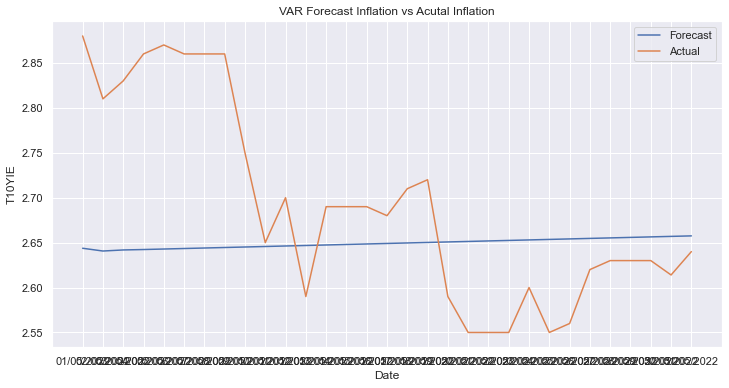

In [70]:
#Sentiment same plot
plt.figure(figsize=(12,6))
plt.plot(df_results.index, df_results['BEIR_forecast'], label = "Forecast")
# plotting the line 2 points 
plt.plot(df_results.index, df_test['BEIR'], label = "Actual")
plt.xlabel('Date')
# Set the y axis label of the current axis.
plt.ylabel('T10YIE')
# Set a title of the current axes.
plt.title('VAR Forecast Inflation vs Acutal Inflation')
plt.savefig('var_trad_forecast.png')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

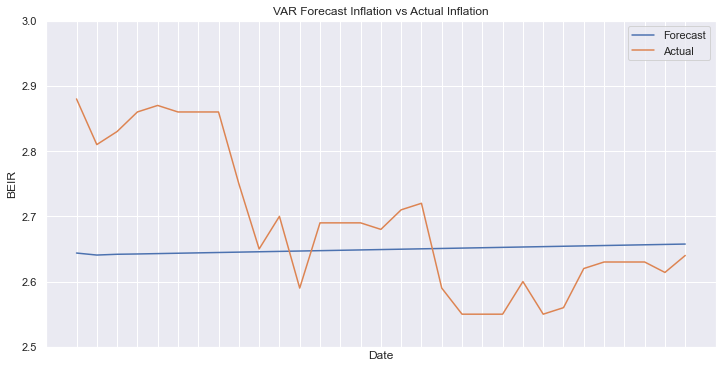

In [71]:
plt.figure(figsize=(12,6))
plt.plot(df_results.index, df_results['BEIR_forecast'], label = "Forecast")
# plotting the line 2 points 
plt.plot(df_results.index, df_test['BEIR'], label = "Actual")
plt.xlabel('Date')
# Set the y axis label of the current axis.
plt.ylabel('BEIR')
# Set a title of the current axes.
plt.title('VAR Forecast Inflation vs Actual Inflation')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylim(2.5,3)
# show a legend on the plot
plt.legend()
plt.savefig('var_forecast.png')
# Display a figure.
plt.show()

In [72]:
def train_test_plot(model, X_train, X_test, name):
    """
    This will plot the actual values of CPI against the one fitted by the model
    We train the model until 2009 and then use it from 2009 onwards on the test features dataset
    """
    fig, ax = plt.subplots(figsize=(12,6))
    colors = sns.color_palette("deep", 8)
    plt.ylim(2.5,3)
    
    yvalues = pd.DataFrame(y_test)
    
    forecasted = list(model.predict(X_test)) # Use the model fit on features data from 2009 onwards
    df_fcast = pd.DataFrame({"date": list(yvalues.index), "BEIR_fcast": forecasted})
    df_fcast = df_fcast.set_index("date")
    
    df = pd.merge(yvalues, df_fcast, left_index=True, right_index=True)

    df["BEIR_fcast"].plot(ax=ax, legend=True, linewidth=2.5, linestyle="dashed", color="forestgreen") # CPI fitted
    df["BEIR"].plot(ax=ax, legend=True, linewidth=1.5, linestyle="solid", color="salmon") # Actual CPI values
    
    ax.set_title("BEIR vs. Model's BEIR")
    ax.set_ylabel("BEIR")
    ax.legend(["Forecasted BEIR","Actual BEIR"])
    plt.savefig(name)

In [73]:
df_results['BEIR_forecast']

date
01/05/2022    2.643733
02/05/2022    2.640652
03/05/2022    2.641845
04/05/2022    2.642312
05/05/2022    2.642881
06/05/2022    2.643443
07/05/2022    2.644005
08/05/2022    2.644568
09/05/2022    2.645130
10/05/2022    2.645693
11/05/2022    2.646255
12/05/2022    2.646817
13/05/2022    2.647380
14/05/2022    2.647942
15/05/2022    2.648505
16/05/2022    2.649067
17/05/2022    2.649630
18/05/2022    2.650192
19/05/2022    2.650755
20/05/2022    2.651317
21/05/2022    2.651880
22/05/2022    2.652442
23/05/2022    2.653005
24/05/2022    2.653567
25/05/2022    2.654129
26/05/2022    2.654692
27/05/2022    2.655254
28/05/2022    2.655817
29/05/2022    2.656379
30/05/2022    2.656942
31/05/2022    2.657504
Name: BEIR_forecast, dtype: float64

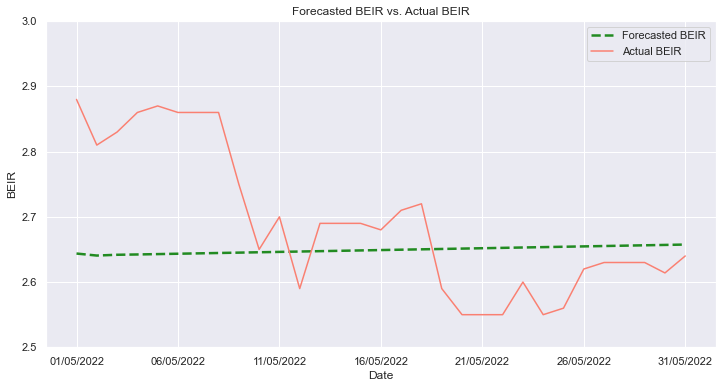

In [74]:
fig, ax = plt.subplots(figsize=(12,6))
colors = sns.color_palette("deep", 8)
plt.ylim(2.5,3)
    
yvalues = pd.DataFrame(y_test)
    
df_results['BEIR_forecast'].plot(ax=ax, legend=True, linewidth=2.5, linestyle="dashed", color="forestgreen") # CPI fitted
df_test["BEIR"].plot(ax=ax, legend=True, linewidth=1.5, linestyle="solid", color="salmon") # Actual CPI values
    
ax.set_title("Forecasted BEIR vs. Actual BEIR")
ax.set_ylabel("BEIR")
ax.set_xlabel("Date")
ax.legend(["Forecasted BEIR","Actual BEIR"])
plt.savefig('var_forecast.png')

In [75]:
from sklearn import (linear_model, metrics, neural_network, pipeline, preprocessing, model_selection)

In [76]:
#Forecast MSE
metrics.mean_squared_error(df_results['BEIR_forecast'], df_test['BEIR'], squared = False)

0.12092803829249299

In [77]:
rmse = metrics.mean_squared_error(df_results['BEIR_forecast'], df_test['BEIR'], squared = False)
error = (rmse/np.mean(df_test['BEIR']))*100
error
#We see that the RMSE is quite low compared to the mean (9.3% of the size of the mean overall), 
#which means that XGBoost did quite a good job at predicting the values of the test set. 

4.49417266534069

In [79]:
df_results

,overall_sentiment_score_20d_lag_1d,overall_attention_score_20d_lag_1d,BEIR_1d,interest_rate_1yr_lag_1d,commodities_1yr_lag_1d,UNRATENSA_1yr_lag_1d,UMCSENT_2wk_lag_1d,WM2NS_1yr_lag_1d,gdp_1yr_lag_1d,USDEUR_1yr_lag_1d,overall_sentiment_score_20d_lag_forecast,overall_attention_score_20d_lag_forecast,BEIR_forecast,interest_rate_1yr_lag_forecast,commodities_1yr_lag_forecast,UNRATENSA_1yr_lag_forecast,UMCSENT_2wk_lag_forecast,WM2NS_1yr_lag_forecast,gdp_1yr_lag_forecast,USDEUR_1yr_lag_forecast
date,,,,,,,,,,,,,,,,,,,,
01/05/2022,5.772958,-0.277291,0.003733,0.000205,0.676903,-0.027368,-0.007632,22.280299,9.724175,0.000377,-37.917942,8.916790,2.643733,0.050205,155.777482,5.472632,58.392368,20306.180299,22750.683175,1.073477
02/05/2022,-1.464491,0.135403,-0.003081,0.000003,0.092023,-0.014986,-0.090277,4.915172,5.034970,-0.000384,-39.382433,9.052194,2.640652,0.050208,155.869505,5.457646,58.302091,20311.095471,22755.718145,1.073093
03/05/2022,-0.067339,0.002294,0.001192,-0.000035,0.177308,-0.016009,-0.057424,7.189762,9.611962,-0.000437,-39.449772,9.054487,2.641845,0.050174,156.046813,5.441637,58.244667,20318.285233,22765.330107,1.072656
04/05/2022,-0.263804,0.023400,0.000467,-0.000025,0.151422,-0.015864,-0.068350,6.524646,9.000516,-0.000389,-39.713575,9.077888,2.642312,0.050149,156.198236,5.425773,58.176317,20324.809879,22774.330622,1.072267
05/05/2022,-0.232382,0.018259,0.000569,-0.000023,0.155395,-0.015801,-0.067263,6.605195,9.030698,-0.000408,-39.945958,9.096147,2.642881,0.050125,156.353631,5.409972,58.109054,20331.415074,22783.361321,1.071859
06/05/2022,-0.234386,0.019005,0.000562,-0.000025,0.154468,-0.015805,-0.067331,6.589675,9.036359,-0.000404,-40.180343,9.115152,2.643443,0.050101,156.508099,5.394167,58.041723,20338.004749,22792.397680,1.071455
07/05/2022,-0.235267,0.018885,0.000562,-0.000024,0.154613,-0.015807,-0.067359,6.590713,9.035968,-0.000405,-40.415610,9.134037,2.644005,0.050076,156.662711,5.378360,57.974365,20344.595462,22801.433648,1.071050
08/05/2022,-0.234604,0.018891,0.000563,-0.000025,0.154589,-0.015806,-0.067350,6.590648,9.035885,-0.000405,-40.650214,9.152928,2.644568,0.050051,156.817300,5.362554,57.907015,20351.186109,22810.469533,1.070645
09/05/2022,-0.234887,0.018895,0.000562,-0.000025,0.154590,-0.015806,-0.067353,6.590600,9.035917,-0.000405,-40.885101,9.171823,2.645130,0.050027,156.971890,5.346748,57.839662,20357.776709,22819.505450,1.070241


In [83]:
df_results['BEIR_forecast'].to_csv('BEIR_forecast_w_OASOSS.csv')